In [3]:
import pandas as pd
import numpy.matlib as np
import pathlib 
from process.cp_image_data import cp_image_data, image_stats
from process.cp_image_data import cp_image_data
from process.compile_object_data import compile_object_data
import seaborn as sns
import matplotlib.pyplot as plt

/home/ubuntu/miniconda3/envs/cell-imaging-2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [80]:
drop_columns = pd.read_csv('/lab/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/2022-08-30_soma_objects_image_column_drop_list.csv', header=None, dtype=str)
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/platemap.csv')
data_path = '/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_Image.csv'
data, pm = cp_image_data(data_path, pm, drop_columns)
data = data.drop(data.loc[:,data.isna().any(axis=0)], axis=1)

In [119]:
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/platemap.csv')
data = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_Image.csv')
i_plate = 5
i_well=240
data.iloc[i_well:i_well+60,:].to_csv('/lab/processed-data/221121_45_Gene_KO_Screen_plate' +str(i_plate+1) + '/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_Image.csv')
i_well=300
pm.iloc[i_well:i_well+60,:].to_csv('/lab/processed-data/221121_45_Gene_KO_Screen_plate' +str(i_plate+1) + '/platemap.csv')

In [30]:
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/platemap.csv')
pm.index = pm['filename']
data = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_segment/2022-12-03_soma_segment_Image.csv')
data.index = data['FileName_morphology']
data = data.reindex(pm.index)
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
for i_plate, i_well in enumerate(np.arange(0,360,60)):
    d = data.iloc[i_well:i_well+60,:]
    p = pm.iloc[i_well:i_well+60,:]
    d[numeric_cols] = d[numeric_cols] / d[numeric_cols].loc[p['condition'] == 'NT', :].median(axis=0)
    data.iloc[i_well:i_well+60,:] = d
data.to_csv('/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_segment/2022-12-03_soma_segment_Image.csv')
# pm.to_csv('/lab/processed-data/221121_45_Gene_KO_Screen/platemap.csv')

/tmp/ipykernel_9260/3437980154.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[numeric_cols] = d[numeric_cols] / d[numeric_cols].loc[p['condition'] == 'NT', :].median(axis=0)
/tmp/ipykernel_9260/3437980154.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[numeric_cols] = d[numeric_cols] / d[numeric_cols].loc[p['condition'] == 'NT', :].median(axis=0)
/tmp/ipykernel_9260/3437980154.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/platemap.csv')
pm.index = pm['filename']
data = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_segment/2022-12-03_soma_segment_Image.csv')
data.index = data['FileName_morphology']
data = data.reindex(pm.index)
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
for i_plate, i_well in enumerate(np.arange(0,360,60)):
    d = data.iloc[i_well:i_well+60,:]
    p = pm.iloc[i_well:i_well+60,:]
    d[numeric_cols] = d[numeric_cols] / d[numeric_cols].loc[p['condition'] == 'NT', :].median(axis=0)
    d.to_csv('/lab/processed-data/221121_45_Gene_KO_Screen_plate' +str(i_plate+1) + '/2022-12-03_soma_segment/2022-12-03_soma_segment_Image.csv')
    p.to_csv('/lab/processed-data/221121_45_Gene_KO_Screen_plate' +str(i_plate+1) + '/platemap.csv')

In [11]:
d.loc[p['condition'] == 'NT', :].mean(axis=0)

/tmp/ipykernel_9260/1337175272.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d.loc[p['condition'] == 'NT', :].mean(axis=0)


Channel_CellROX                                                    -1.000000
Channel_LysoSensor                                                 -1.000000
Channel_TMRM                                                       -1.000000
Channel_morphology                                                 -1.000000
Count_soma                                                         89.833333
                                                                    ...     
StDev_soma_RadialDistribution_ZernikeMagnitude_morphology_9_9       0.000313
Width_CellROX                                                    1024.000000
Width_LysoSensor                                                 1024.000000
Width_TMRM                                                       1024.000000
Width_morphology                                                 1024.000000
Length: 1075, dtype: float64

In [51]:
'/lab/processed-data/221121_45_Gene_KO_Screen_' +str(i_plate+1) + '/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_Image.csv'

'/lab/processed-data/221121_45_Gene_KO_Screen_6/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_Image.csv'

In [57]:
data.iloc[i_well:i_well+60,:]

,Channel_CellROX,Channel_LysoSensor,Channel_TMRM,Channel_morphology,Count_soma,ExecutionTime_01Images,ExecutionTime_02Metadata,ExecutionTime_03NamesAndTypes,ExecutionTime_04Groups,ExecutionTime_05MedianFilter,...,StDev_soma_RadialDistribution_ZernikeMagnitude_morphology_9_9,URL_CellROX,URL_LysoSensor,URL_TMRM,URL_morphology,URL_soma_outlines,Width_CellROX,Width_LysoSensor,Width_TMRM,Width_morphology
300,-1,-1,-1,-1,84.0,0.0,0.0,0.32,0.0,0.28,...,0.000533,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
301,-1,-1,-1,-1,125.0,0.0,0.0,0.40,0.0,0.28,...,0.000449,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
302,-1,-1,-1,-1,110.0,0.0,0.0,0.31,0.0,0.27,...,0.000470,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
303,-1,-1,-1,-1,108.0,0.0,0.0,0.32,0.0,0.28,...,0.000340,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
304,-1,-1,-1,-1,134.0,0.0,0.0,0.31,0.0,0.27,...,0.000474,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
305,-1,-1,-1,-1,91.0,0.0,0.0,0.38,0.0,0.28,...,0.000449,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
306,-1,-1,-1,-1,101.0,0.0,0.0,0.39,0.0,0.28,...,0.000420,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
307,-1,-1,-1,-1,87.0,0.0,0.0,0.32,0.0,0.28,...,0.000325,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
308,-1,-1,-1,-1,101.0,0.0,0.0,0.35,0.0,0.28,...,0.000419,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024
309,-1,-1,-1,-1,90.0,0.0,0.0,0.31,0.0,0.28,...,0.000449,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,file:/lab/processed-data/221121_45_Gene_KO_Scr...,1024,1024,1024,1024


In [ ]:
2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_plate' +str(i_plate+1) +'_Image.csv')

In [97]:
data.iloc[i_well:i_well+60,:]['Mean_soma_Intensity_MedianIntensity_TMRM']
data.iloc[i_well:i_well+60,:]['FileName_TMRM']

Series([], Name: FileName_TMRM, dtype: object)

In [98]:
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen_plate6/platemap.csv')
pm

,Unnamed: 0,condition,filename,plate,row,col
0,300,RANBP10,Rep2_GeneSet3_B02_488 SD.tif,Plate 6,B,2
1,301,RANBP10,Rep2_GeneSet3_B03_488 SD.tif,Plate 6,B,3
2,302,RANBP10,Rep2_GeneSet3_B04_488 SD.tif,Plate 6,B,4
3,303,TXNDC15,Rep2_GeneSet3_B05_488 SD.tif,Plate 6,B,5
4,304,TXNDC15,Rep2_GeneSet3_B06_488 SD.tif,Plate 6,B,6
5,305,TXNDC15,Rep2_GeneSet3_B07_488 SD.tif,Plate 6,B,7
6,306,NT,Rep2_GeneSet3_B08_488 SD.tif,Plate 6,B,8
7,307,BCL2L1,Rep2_GeneSet3_B09_488 SD.tif,Plate 6,B,9
8,308,BCL2L1,Rep2_GeneSet3_B10_488 SD.tif,Plate 6,B,10
9,309,BCL2L1,Rep2_GeneSet3_B11_488 SD.tif,Plate 6,B,11


In [101]:
data_path = '/lab/processed-data/221121_45_Gene_KO_Screen_plate6/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_Image.csv'
data = pd.read_csv(data_path)
data['Mean_soma_Intensity_MedianIntensity_TMRM']
data['FileName_morphology']

0     img_B02_488 SD.tif
1     img_B03_488 SD.tif
2     img_B04_488 SD.tif
3     img_B05_488 SD.tif
4     img_B06_488 SD.tif
5     img_B07_488 SD.tif
6     img_B08_488 SD.tif
7     img_B09_488 SD.tif
8     img_B10_488 SD.tif
9     img_B11_488 SD.tif
10    img_C02_488 SD.tif
11    img_C03_488 SD.tif
12    img_C04_488 SD.tif
13    img_C05_488 SD.tif
14    img_C06_488 SD.tif
15    img_C07_488 SD.tif
16    img_C08_488 SD.tif
17    img_C09_488 SD.tif
18    img_C10_488 SD.tif
19    img_C11_488 SD.tif
20    img_D02_488 SD.tif
21    img_D03_488 SD.tif
22    img_D04_488 SD.tif
23    img_D05_488 SD.tif
24    img_D06_488 SD.tif
25    img_D07_488 SD.tif
26    img_D08_488 SD.tif
27    img_D09_488 SD.tif
28    img_D10_488 SD.tif
29    img_D11_488 SD.tif
30    img_E02_488 SD.tif
31    img_E03_488 SD.tif
32    img_E04_488 SD.tif
33    img_E05_488 SD.tif
34    img_E06_488 SD.tif
35    img_E07_488 SD.tif
36    img_E08_488 SD.tif
37    img_E09_488 SD.tif
38    img_E10_488 SD.tif
39    img_E11_488 SD.tif


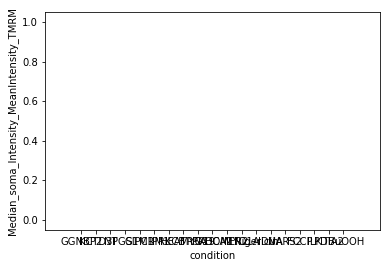

In [78]:
data_path = '/lab/processed-data/221121_45_Gene_KO_Screen_plate5/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_Image.csv'
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen_plate5/platemap.csv')
data, pm = cp_image_data(data_path, pm, drop_columns)
data['condition'] = data.index
sns.boxplot(data, x='condition', y='Median_soma_Intensity_MeanIntensity_TMRM')
sns.scatterplot(data, x='condition', y='Median_soma_Intensity_MeanIntensity_TMRM')

In [79]:
data['Median_soma_Intensity_MeanIntensity_TMRM']

condition
GGNBP2      NaN
GGNBP2      NaN
GGNBP2      NaN
KCTD3       NaN
KCTD3       NaN
KCTD3       NaN
NT          NaN
PGS1        NaN
PGS1        NaN
PGS1        NaN
GIPC1       NaN
GIPC1       NaN
GIPC1       NaN
MRM1        NaN
MRM1        NaN
MRM1        NaN
NT          NaN
PRKCB       NaN
PRKCB       NaN
PRKCB       NaN
HEATR5A     NaN
HEATR5A     NaN
HEATR5A     NaN
MYO19       NaN
MYO19       NaN
MYO19       NaN
NT          NaN
PROCA1      NaN
PROCA1      NaN
PROCA1      NaN
HOMER2      NaN
HOMER2      NaN
HOMER2      NaN
MYO1A       NaN
MYO1A       NaN
MYO1A       NaN
NT          NaN
Nigericin   NaN
Nigericin   NaN
Nigericin   NaN
IDUA        NaN
IDUA        NaN
IDUA        NaN
NARS2       NaN
NARS2       NaN
NARS2       NaN
NT          NaN
FCCP        NaN
FCCP        NaN
FCCP        NaN
ILK         NaN
ILK         NaN
ILK         NaN
PDIA2       NaN
PDIA2       NaN
PDIA2       NaN
NT          NaN
TBuOOH      NaN
TBuOOH      NaN
TBuOOH      NaN
Name: Median_soma_Intensity_Me

In [68]:
data

,Unnamed: 0,Count_soma,Mean_soma_AreaShape_Area,Mean_soma_AreaShape_BoundingBoxArea,Mean_soma_AreaShape_CentralMoment_0_0,Mean_soma_AreaShape_CentralMoment_0_1,Mean_soma_AreaShape_CentralMoment_0_2,Mean_soma_AreaShape_CentralMoment_0_3,Mean_soma_AreaShape_CentralMoment_1_0,Mean_soma_AreaShape_CentralMoment_1_1,...,StDev_soma_RadialDistribution_RadialCV_LysoSensor_3of4,StDev_soma_RadialDistribution_RadialCV_LysoSensor_4of4,StDev_soma_RadialDistribution_RadialCV_TMRM_1of4,StDev_soma_RadialDistribution_RadialCV_TMRM_2of4,StDev_soma_RadialDistribution_RadialCV_TMRM_3of4,StDev_soma_RadialDistribution_RadialCV_TMRM_4of4,StDev_soma_RadialDistribution_RadialCV_morphology_1of4,StDev_soma_RadialDistribution_RadialCV_morphology_2of4,StDev_soma_RadialDistribution_RadialCV_morphology_3of4,StDev_soma_RadialDistribution_RadialCV_morphology_4of4
condition,,,,,,,,,,,,,,,,,,,,,
ALG8,180,101.0,471.534653,663.009901,471.534653,-1.646208e-14,24147.494445,8335.587922,-7.695494e-14,-1822.371174,...,0.055059,0.040278,0.155265,0.224529,0.206039,0.209097,0.075825,0.106937,0.084922,0.109327
ALG8,181,86.0,521.988372,728.034884,521.988372,-2.906202e-14,26288.560946,3563.060937,-3.044593e-14,538.030083,...,0.079068,0.070287,0.187341,0.206733,0.194894,0.188275,0.085577,0.096903,0.083428,0.089997
ALG8,182,141.0,456.460993,655.886525,456.460993,6.169375e-14,21513.093753,3705.632618,-1.068208e-13,101.555897,...,0.121468,0.107823,0.187300,0.210167,0.170426,0.200186,0.085038,0.111019,0.082218,0.114981
CLCN3,183,127.0,472.889764,663.811024,472.889764,-4.089817e-14,21661.726930,2747.599716,6.953668e-14,660.090186,...,0.084462,0.087642,0.168537,0.207122,0.171945,0.217202,0.087138,0.113579,0.085595,0.112505
CLCN3,184,104.0,452.096154,626.442308,452.096154,2.320366e-14,22305.230722,10316.586095,-8.465024e-14,-319.216684,...,0.113944,0.105853,0.165007,0.210016,0.190744,0.177873,0.084931,0.103178,0.077391,0.097444
CLCN3,185,130.0,484.392308,692.169231,484.392308,-1.086379e-13,24008.139108,-638.088009,-1.606920e-14,-1286.041845,...,0.096447,0.086304,0.176893,0.199972,0.179556,0.221179,0.084352,0.103651,0.083576,0.102937
NT,186,126.0,493.103175,713.095238,493.103175,4.538169e-14,25494.768295,1265.541889,1.859676e-13,-1190.444557,...,0.074189,0.067105,0.192545,0.234635,0.212287,0.259668,0.085071,0.113543,0.097522,0.121566
DHRS11,187,55.0,578.763636,810.909091,578.763636,1.918627e-13,32269.630818,-342.636637,-4.643881e-13,-4210.265422,...,0.076664,0.057829,0.190302,0.194527,0.181028,0.205544,0.073828,0.087607,0.079310,0.083782
DHRS11,188,93.0,504.290323,721.956989,504.290323,1.005552e-13,28480.149001,12308.945685,1.751526e-14,1576.045701,...,0.062821,0.064078,0.181420,0.214731,0.183845,0.197344,0.085638,0.113704,0.081957,0.106904


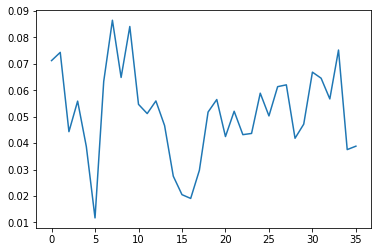

In [42]:
plt.plot(data.query('condition=="NT"')['Mean_soma_Intensity_MedianIntensity_TMRM'].values)

In [ ]:
plt.plot(data.query('condition=="NT"')['Mean_soma_Intensity_MedianIntensity_TMRM'].values)

In [19]:
data = data - data.median(axis=0)
data = data / data.mad(axis=0)
data.to_csv('/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_cellpose_Image_processed_z.csv')

/tmp/ipykernel_1932/1312642452.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  data = data / data.mad(axis=0)


In [10]:
data.mean(axis=0)

Intensity_LowerQuartileIntensity_CellROX_masked       7.745947e-02
Intensity_LowerQuartileIntensity_Lysosensor_masked    1.116392e-01
Intensity_LowerQuartileIntensity_TMRM_masked          4.916510e-02
Intensity_LowerQuartileIntensity_Threshold            0.000000e+00
Intensity_LowerQuartileIntensity_morphology_masked    1.236796e-01
Intensity_MADIntensity_CellROX_masked                 8.462030e-02
Intensity_MADIntensity_Lysosensor_masked              1.720980e-02
Intensity_MADIntensity_TMRM_masked                    5.815222e-02
Intensity_MADIntensity_Threshold                      0.000000e+00
Intensity_MADIntensity_morphology_masked              3.680824e-02
Intensity_MaxIntensity_CellROX_masked                 7.606387e-01
Intensity_MaxIntensity_Lysosensor_masked              7.442604e-01
Intensity_MaxIntensity_TMRM_masked                    6.458242e-01
Intensity_MaxIntensity_Threshold                      1.000000e+00
Intensity_MaxIntensity_morphology_masked              6.849454

In [4]:
np.arange(60,360,60)

array([ 60, 120, 180, 240, 300])

In [28]:
for i in np.arange(60,360,60):
    single_plate_data = data.iloc[:i, :]
    data.iloc[:i, :] = data.iloc[:i, :] / single_plate_data.loc['NT'].median(axis=0)

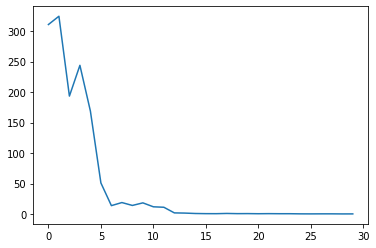

In [29]:
plt.plot(single_plate_data.loc['NT']['Mean_soma_Intensity_MedianIntensity_TMRM'].values)

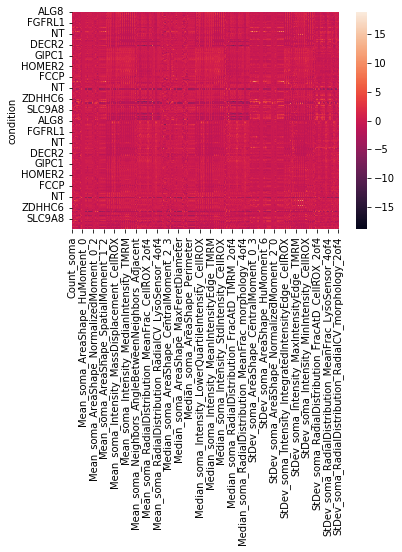

In [8]:
sns.heatmap((data - data.mean(axis=0)) / data.std(axis=0))

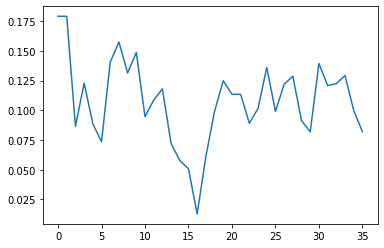

In [23]:
# plt.plot(data.iloc[np.arange(6,360,10), :]['Intensity_MedianIntensity_Lysosensor_masked'])
# data.iloc[6,]
plt.plot(data.iloc[np.arange(6,360,10), :]['Intensity_MedianIntensity_TMRM_masked'].values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

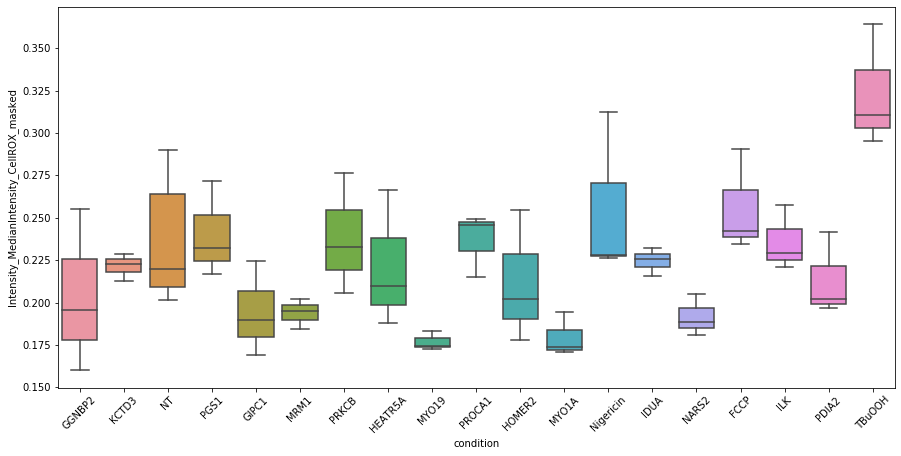

In [49]:
plt.rcParams['figure.figsize'] = (15, 7)
data['condition'] = pm['condition']
sns.boxplot(data.iloc[60:120,:], x='condition', y='Intensity_MedianIntensity_CellROX_masked')
plt.xticks(rotation=45)

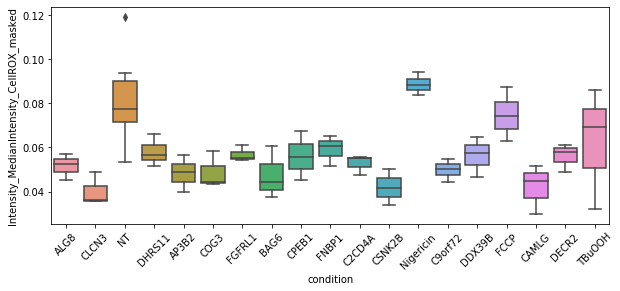

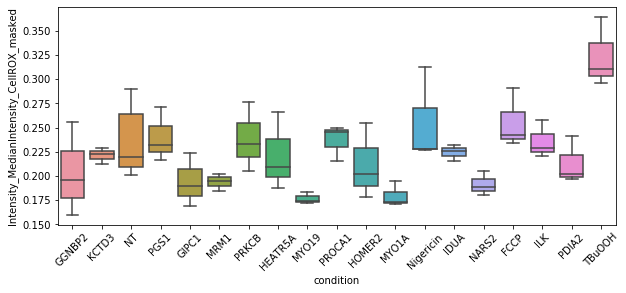

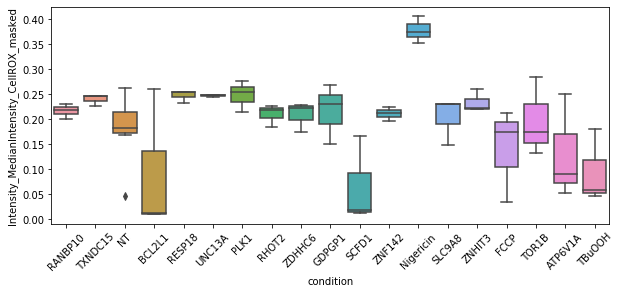

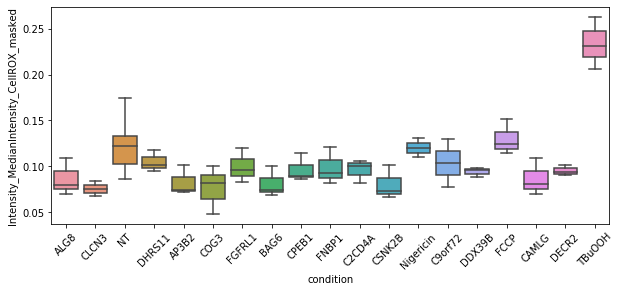

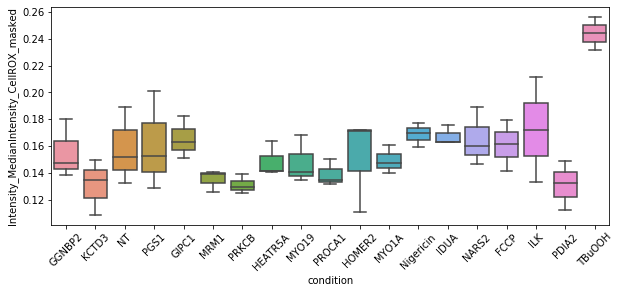

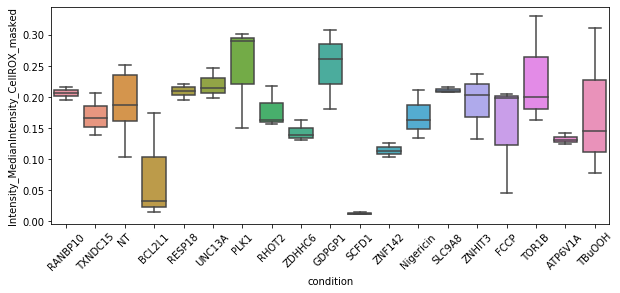

In [51]:
for i in np.arange(0,360,60):
    plt.rcParams['figure.figsize'] = (10, 4)
    data['condition'] = pm['condition']
    sns.boxplot(data.iloc[i:i+60,:], x='condition', y='Intensity_MedianIntensity_CellROX_masked')
    plt.xticks(rotation=45)
    plt.show()

In [2]:
drop_columns = pd.read_csv('/lab/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/2022-08-30_soma_objects_image_column_drop_list.csv', header=None, dtype=str)
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/platemap.csv')
data_path = '/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_Image.csv'
data, pm = cp_image_data(data_path, pm, drop_columns)
# morphology_file = 'FileName_morphology'
# data = pd.read_csv(data_path)
# data.index = data[morphology_file]
# pm.index = pm['filename']
# # Remove unwanted columns
# drop_columns = np.array(drop_columns).astype(str).flatten()
# for col in drop_columns:
#     data = data.drop(data.columns[data.columns.str.contains(col)], axis=1)

# # Reindex data by platemap filenames to make sure row order is correct
# data = data.reindex(pm.index)

# # Set conditions to index
# data.index = pm['condition']
# pm.index = pm['condition']

# # Remove 'no_dye' condition
# if 'no_dye' in data.index:
#     data = data.drop('no_dye', axis=0)
#     pm = pm.drop('no_dye', axis=0)


In [2]:
drop_columns = pd.read_csv('/lab/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/2022-08-30_soma_objects_soma_column_drop_list.csv', header=None, dtype=str)
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/platemap.csv')
data_path = pathlib.Path('/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_soma.csv')
embedded_data = compile_object_data(data_path, pm, drop_columns)

/home/ubuntu/cell-imaging/process/compile_object_data.py:31: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.loc[i] = soma_data.loc[i].mean(axis=0)
/home/ubuntu/cell-imaging/process/compile_object_data.py:57: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data - data.mean(axis=0)
/home/ubuntu/miniconda3/envs/cell-imaging-2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better 

In [3]:
embedded_data

,tSNE 1,tSNE 2,condition
condition,,,
ALG8,46.444641,8.363375,ALG8
ALG8,43.466694,0.920254,ALG8
ALG8,46.577263,-2.187053,ALG8
CLCN3,51.913948,-2.220523,CLCN3
CLCN3,48.034065,-3.092128,CLCN3
...,...,...,...
ATP6V1A,5.023741,-4.712991,ATP6V1A
NT,-27.060184,-50.658802,NT
TBuOOH,52.751297,-37.960052,TBuOOH


In [66]:
len(set(data.index) - set(pm.index))

0

In [69]:
# data = pd.read_csv(data_path)
data.isna().sum().sum()

3240

In [3]:
drop_columns = pd.read_csv('/lab/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/2022-08-30_soma_objects_image_column_drop_list.csv', header=None, dtype=str)
pm = pd.read_csv('/lab/processed-data/221121_45_Gene_KO_Screen/platemap.csv')
data_path = '/lab/processed-data/221121_45_Gene_KO_Screen/2022-12-03_soma_objects_cellpose/2022-12-03_soma_objects_Image.csv'
# data, pm = cp_image_data(data_path, pm, drop_columns)
morphology_file = 'FileName_morphology'
data = pd.read_csv(data_path)
data.index = data[morphology_file]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

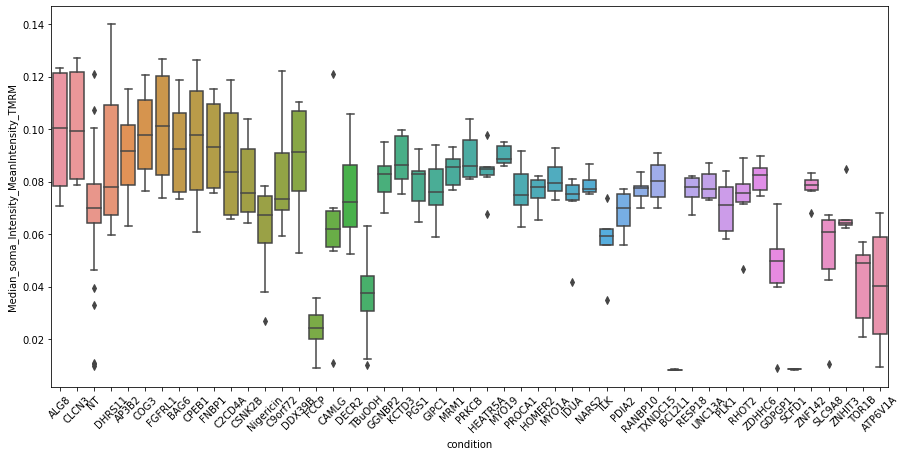

In [3]:
plt.rcParams['figure.figsize'] = (15, 7)
data['condition'] = pm['condition']
sns.boxplot(data, x='condition', y='Median_soma_Intensity_MeanIntensity_TMRM')
plt.xticks(rotation=45)

In [20]:
data.index.unique()

Index(['ALG8', 'CLCN3', 'NT', 'DHRS11', 'AP3B2', 'COG3', 'FGFRL1', 'BAG6',
       'CPEB1', 'FNBP1', 'C2CD4A', 'CSNK2B', 'Nigericin', 'C9orf72', 'DDX39B',
       'FCCP', 'CAMLG', 'DECR2', 'TBuOOH', 'GGNBP2', 'KCTD3', 'PGS1', 'GIPC1',
       'MRM1', 'PRKCB', 'HEATR5A', 'MYO19', 'PROCA1', 'HOMER2', 'MYO1A',
       'IDUA', 'NARS2', 'ILK', 'PDIA2', 'RANBP10', 'TXNDC15', 'BCL2L1',
       'RESP18', 'UNC13A', 'PLK1', 'RHOT2', 'ZDHHC6', 'GDPGP1', 'SCFD1',
       'ZNF142', 'SLC9A8', 'ZNHIT3', 'TOR1B', 'ATP6V1A'],
      dtype='object', name='condition')